In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as ply
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score,recall_score

In [13]:
df = pd.read_csv("diabetes.csv")

In [14]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

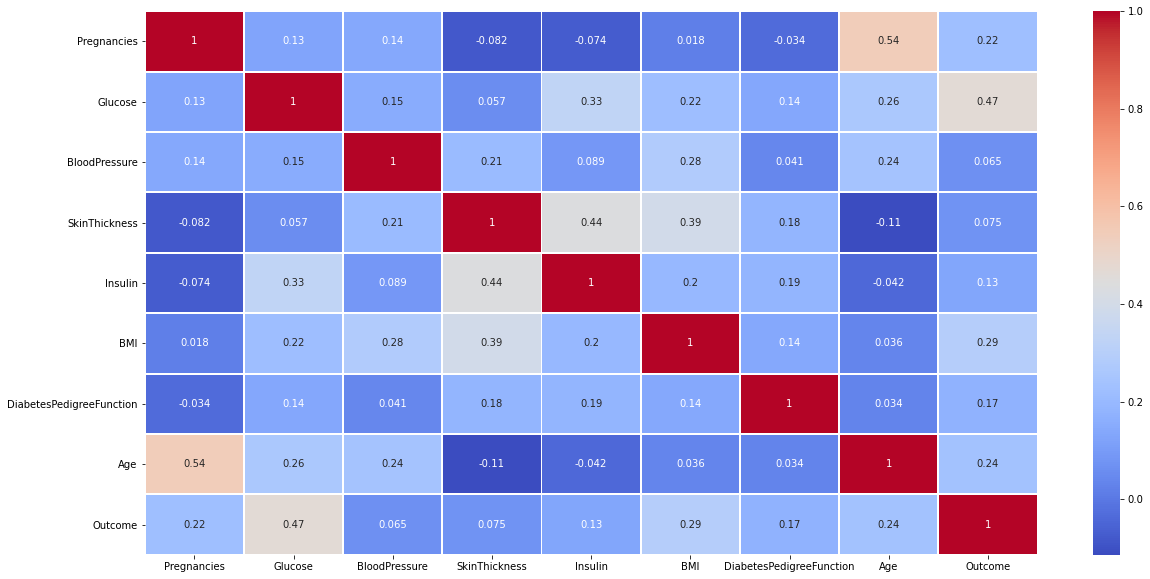

In [18]:
corr_df = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_df, cmap = 'coolwarm', linecolor = 'white', linewidth =1, annot = True)

In [20]:
corr_df["Outcome"].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [21]:
values = pd.Series(df["Outcome"]).value_counts()
trace = go.Pie(values=values)
ply.iplot([trace])

<AxesSubplot:xlabel='Age', ylabel='BMI'>

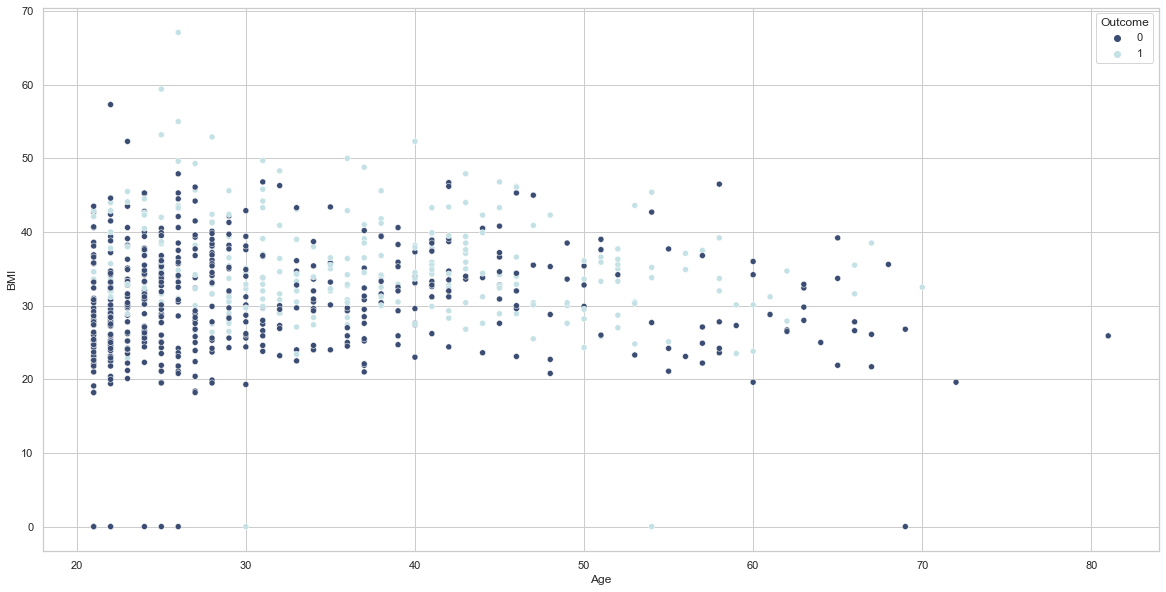

In [11]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = df['Age'], y = df['BMI'], palette="ch:r=-.2,d=.3_r", hue = df["Outcome"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

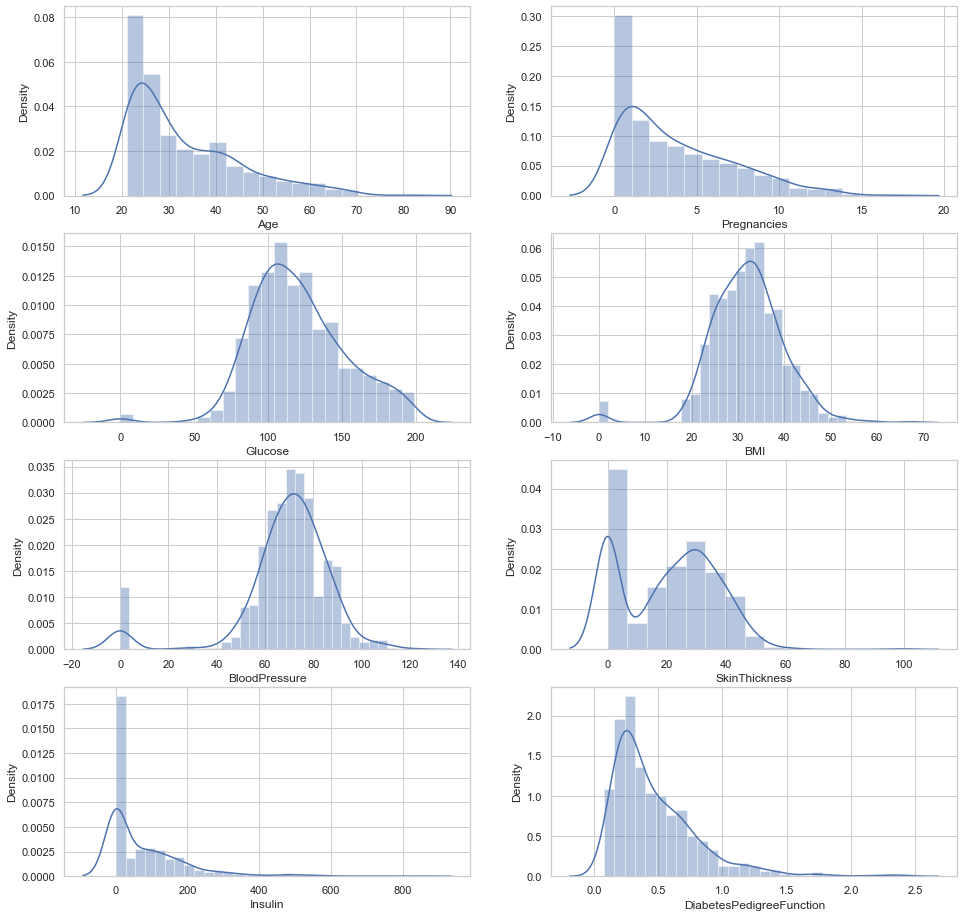

In [12]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df["Age"], ax = ax[0,0])
sns.distplot(df["Pregnancies"], ax = ax[0,1])
sns.distplot(df["Glucose"], ax = ax[1,0])
sns.distplot(df["BMI"], ax = ax[1,1])
sns.distplot(df["BloodPressure"], ax = ax[2,0])
sns.distplot(df["SkinThickness"], ax = ax[2,1])
sns.distplot(df["Insulin"], ax = ax[3,0])
sns.distplot(df["DiabetesPedigreeFunction"], ax = ax[3,1])

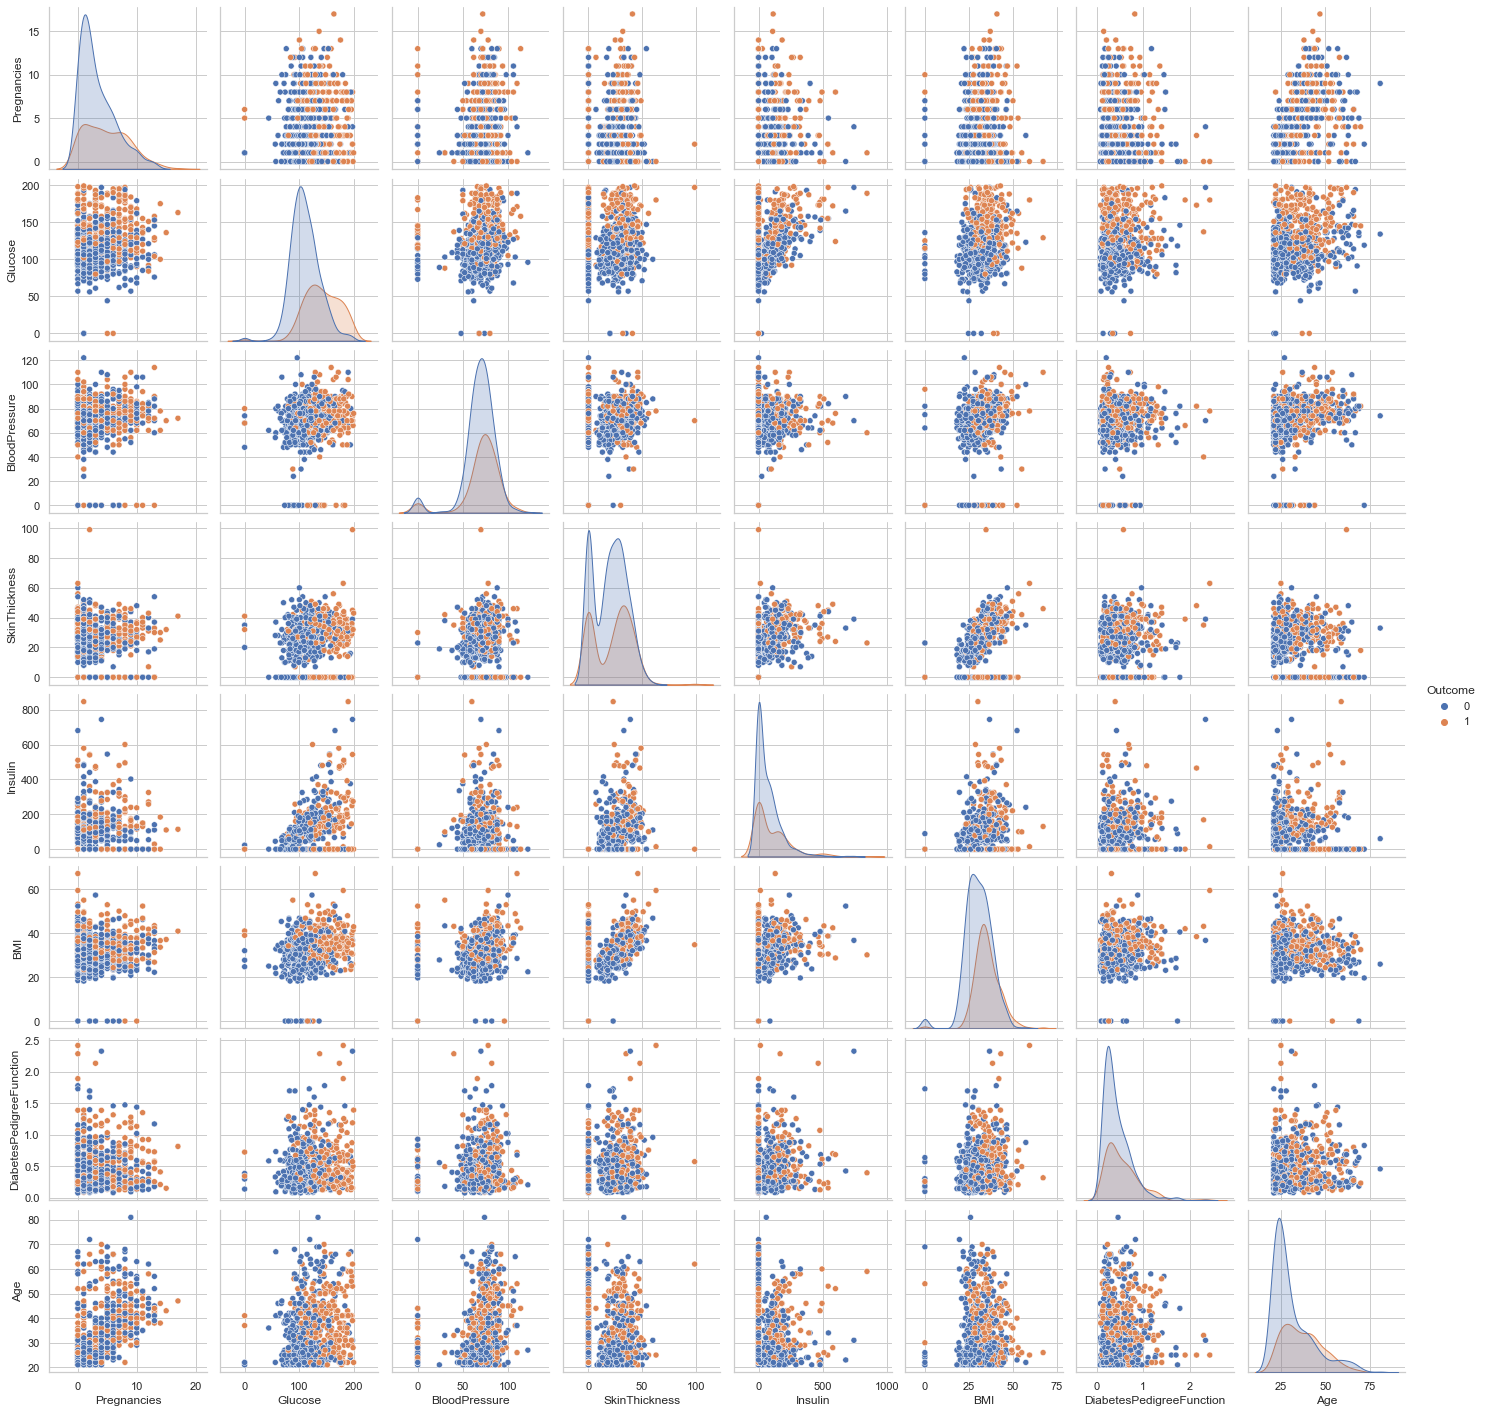

In [13]:
sns.pairplot(df, hue='Outcome')

In [14]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

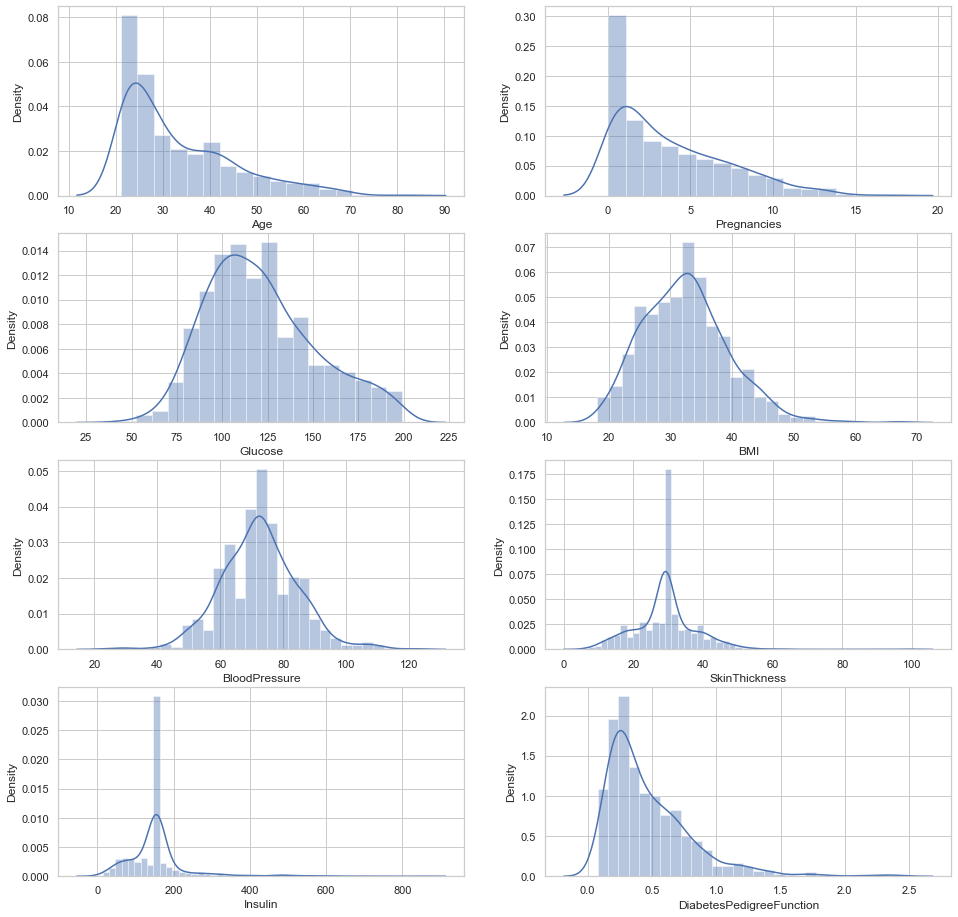

In [15]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df["Age"], ax = ax[0,0])
sns.distplot(df["Pregnancies"], ax = ax[0,1])
sns.distplot(df["Glucose"], ax = ax[1,0])
sns.distplot(df["BMI"], ax = ax[1,1])
sns.distplot(df["BloodPressure"], ax = ax[2,0])
sns.distplot(df["SkinThickness"], ax = ax[2,1])
sns.distplot(df["Insulin"], ax = ax[3,0])
sns.distplot(df["DiabetesPedigreeFunction"], ax = ax[3,1])

In [16]:
ss = StandardScaler()
X = ss.fit_transform(df)

In [17]:
X =  pd.DataFrame(ss.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [18]:
X.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  
0  0.166292                  0.468492  1.425995  
1 -0.852531                 -0.365061 -0.190672  
2 -1.332833                  0.604397 -0.105584  
3 -0.634212                 -0.920763 -1.041549  
4  1.548980                  5.484909 -0.020496

In [19]:
y = df['Outcome']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

<h3>Logistic Regression</h3>

In [21]:
log_reg = LogisticRegression(random_state=42)

In [22]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
logp = log_reg.predict(X_test)

In [24]:
y_train_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=3)

In [25]:
confusion_matrix(y_train,y_train_pred_log)

array([[263,  36],
       [ 68,  93]], dtype=int64)

In [26]:
print('Precision Score {}'.format(round(precision_score(y_test,logp),3)))
print('Recall Score {}'.format(round(recall_score(y_test,logp),3)))
print("ROC AUC {}".format(round(roc_auc_score(y_test,logp),3)))

Precision Score 0.667
Recall Score 0.579
ROC AUC 0.713


<h3>Gradient Boosting</h3>

In [27]:
gbrt = GradientBoostingClassifier(random_state=42)

In [28]:
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
gbrtp = gbrt.predict(X_test)

In [30]:
y_gbrt = cross_val_predict(gbrt, X_train, y_train, cv=3)

In [31]:
confusion_matrix(y_train,y_gbrt)

array([[254,  45],
       [ 64,  97]], dtype=int64)

In [32]:
print('Precision Score {}'.format(round(precision_score(y_test,gbrtp),3)))
print('Recall Score {}'.format(round(recall_score(y_test,gbrtp),3)))
print("ROC AUC {}".format(round(roc_auc_score(y_test,gbrtp),3)))

Precision Score 0.612
Recall Score 0.589
ROC AUC 0.695


<h3>Random Classifier</h3>

In [33]:
forest_clf = RandomForestClassifier(random_state=42)

In [34]:
forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [35]:
ranp = forest_clf.predict(X_test)

In [36]:
y_train_pred_ran = cross_val_predict(forest_clf, X_train, y_train, cv=3)

In [37]:
confusion_matrix(y_train,y_train_pred_ran)

array([[259,  40],
       [ 63,  98]], dtype=int64)

In [38]:
print('Precision Score {}'.format(round(precision_score(y_test,ranp),3)))
print('Recall Score {}'.format(round(recall_score(y_test,ranp),3)))
print("ROC AUC {}".format(round(roc_auc_score(y_test,ranp),3)))

Precision Score 0.598
Recall Score 0.57
ROC AUC 0.683


<h3>Hyperparameter Optimization</h3>

In [39]:
param_grid = [{'n_estimators':np.arange(1,50)}]

In [40]:
forest_reg = RandomForestClassifier(random_state=42)

In [41]:
grid_search = GridSearchCV(forest_reg,param_grid,cv=5)

In [42]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}])

In [43]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=31, random_state=42)

In [44]:
print("Best Score {}".format(str(grid_search.best_score_)))
print("Best Parameters {}".format(str(grid_search.best_params_)))

Best Score 0.791304347826087
Best Parameters {'n_estimators': 31}


In [45]:
forest_g = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
forest_g.fit(X_train,y_train)

RandomForestClassifier(n_estimators=46, random_state=42)

In [47]:
rang = forest_g.predict(X_test)

In [48]:
y_train_pred_rang = cross_val_predict(forest_g, X_train, y_train, cv=3)

In [49]:
confusion_matrix(y_train,y_train_pred_rang)

array([[261,  38],
       [ 64,  97]], dtype=int64)

In [50]:
print('Precision Score {}'.format(round(precision_score(y_test,rang),3)))
print('Recall Score {}'.format(round(recall_score(y_test,rang),3)))
print("ROC AUC {}".format(round(roc_auc_score(y_test,rang),3)))

Precision Score 0.606
Recall Score 0.533
ROC AUC 0.674


<h4>Logistic and Random Forest Classification</h4>

In [51]:
voting_clf = VotingClassifier(estimators=[('lr', log_reg),('rf', forest_g)], voting='hard')

In [52]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=46,
                                                     random_state=42))])

In [53]:
votinglr= voting_clf.predict(X_test)

In [54]:
y_train_pred_vt = cross_val_predict(voting_clf, X_train, y_train, cv=3)

In [55]:
confusion_matrix(y_train,y_train_pred_vt)

array([[270,  29],
       [ 83,  78]], dtype=int64)

In [56]:
print('Precision Score {}'.format(round(precision_score(y_test,votinglr),3)))
print('Recall Score {}'.format(round(recall_score(y_test,votinglr),3)))

Precision Score 0.667
Recall Score 0.486


<h4>Logistic and Gradient Boosting</h4>

In [57]:
voting_gb = VotingClassifier(estimators=[('lr', log_reg),('gb', gbrt)], voting='hard')
voting_gb.fit(X_train,y_train)
votinggb= voting_clf.predict(X_test)
y_train_pred_vt = cross_val_predict(voting_gb, X_train, y_train, cv=3)

In [58]:
confusion_matrix(y_train,y_train_pred_vt)

array([[272,  27],
       [ 81,  80]], dtype=int64)

<h4>Random Forest and Gradient Boosting</h4>

In [59]:
voting_rg = VotingClassifier(estimators=[('rf', forest_g),('gb', gbrt)], voting='hard')
voting_rg.fit(X_train,y_train)
votingrg= voting_rg.predict(X_test)
y_train_pred_vt = cross_val_predict(voting_rg, X_train, y_train, cv=3)

In [60]:
confusion_matrix(y_train,y_train_pred_vt)

array([[269,  30],
       [ 75,  86]], dtype=int64)

<h4>Logistic, Gradient Boosting, and Random Forest</h4>

In [61]:
voting_lgr = VotingClassifier(estimators=[('lr', log_reg),('gb', gbrt),('rf',forest_g)], voting='hard')
voting_lgr.fit(X_train,y_train)
votinglgr= voting_lgr.predict(X_test)
y_train_pred_vt = cross_val_predict(voting_lgr, X_train, y_train, cv=3)

In [62]:
confusion_matrix(y_train,y_train_pred_vt)

array([[265,  34],
       [ 63,  98]], dtype=int64)

In [63]:
for clf in (voting_clf,voting_gb,voting_rg,voting_lgr):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(round(roc_auc_score(y_test,y_pred),3))

0.678
0.688
0.659
0.686
